In [4]:
###  keras and tensorflow>2.0

In [5]:
#data collection 
import pandas_datareader as pdr
import matplotlib.pyplot as plt 

In [ ]:
df=pdr.get_data_tiingo('NFLX.csv', api_key=key)

In [ ]:
df.to_csv('NFLX.csv')

In [ ]:
import pandas as pd 

In [12]:
df = pd.read_csv('NFLX.csv')

In [13]:
df.head()

,Unnamed: 0.9,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,0,0,0,0,0,0,0,0,0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,1,1,1,1,1,1,1,1,1,1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2,2,2,2,2,2,2,2,2,2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,3,3,3,3,3,3,3,3,3,3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,4,4,4,4,4,4,4,4,4,4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [14]:
df1 = df.reset_index()['Close']

In [15]:
df1.shape

(5044,)

In [16]:
df1

0         1.196429
1         1.210000
2         1.157143
3         1.103571
4         1.071429
           ...    
5039    195.190002
5040    197.440002
5041    192.910004
5042    205.089996
5043    198.979996
Name: Close, Length: 5044, dtype: float64

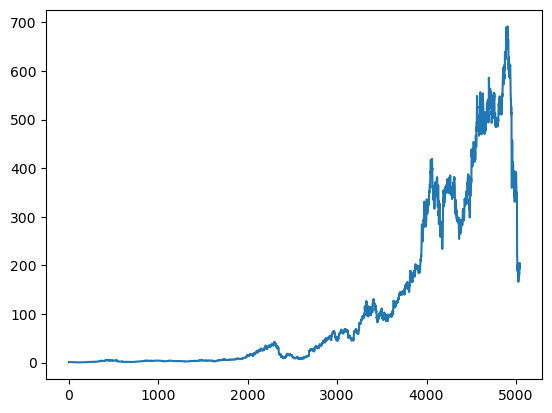

In [17]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [18]:
###LSTM is sensitive to the scale of  data so we apply MinMmax scaler 

In [19]:
import numpy as np 

In [20]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler(feature_range=(0,1))
df1 = Scaler.fit_transform(np.array(df1).reshape(-1,1))

In [21]:
df1.shape

(5044, 1)

In [22]:
print(df1)

[[0.00119131]
 [0.00121094]
 [0.00113448]
 ...
 [0.2785077 ]
 [0.29612623]
 [0.28728803]]


In [23]:
###spltting dataset into test and train split
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[ training_size:len(df1),:1]


In [24]:
training_size, test_size

(3278, 1766)

In [25]:
import numpy 
#convert  an array of values into a dataset matrix
def create_dataset(dataset, time_step = 1):
    dataX,dataY = [],[]
    for i in range (len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0 ]
        dataX.append(a)
        dataY.append(dataset[i +time_step, 0])
    return numpy.array(dataX),numpy.array(dataY)

In [26]:
#reshape into x=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data,  time_step)

In [27]:
print(X_train.shape),print(y_train.shape)

(3177, 100)
(3177,)


(None, None)

In [28]:
print(X_test.shape),print(y_test.shape)

(1665, 100)
(1665,)


(None, None)

In [29]:
#reshape input to be timesteps , features ] which is required for lstm
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [30]:
###create stacked lstm model
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [34]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')



In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test ),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
50/50 [==============================] - 31s 400ms/step - loss: 1.6006e-04 - val_loss: 0.0042
Epoch 2/100
50/50 [==============================] - 17s 338ms/step - loss: 1.4181e-05 - val_loss: 0.0027
Epoch 3/100
50/50 [==============================] - 17s 333ms/step - loss: 1.2977e-05 - val_loss: 0.0024
Epoch 4/100
50/50 [==============================] - 17s 338ms/step - loss: 1.2196e-05 - val_loss: 0.0024
Epoch 5/100
50/50 [==============================] - 16s 329ms/step - loss: 1.0703e-05 - val_loss: 0.0020
Epoch 6/100
50/50 [==============================] - 17s 332ms/step - loss: 1.0052e-05 - val_loss: 0.0029
Epoch 7/100
50/50 [==============================] - 17s 346ms/step - loss: 1.1444e-05 - val_loss: 0.0024
Epoch 8/100
50/50 [==============================] - 17s 351ms/step - loss: 9.6316e-06 - val_loss: 0.0022
Epoch 9/100
50/50 [==============================] - 19s 387ms/step - loss: 9.6839e-06 - val_loss: 0.0022
Epoch 10/100
50/50 [==========================

In [ ]:
import tensorflow as tf 

In [ ]:
tf.__version__

In [ ]:
###lets Do the pedictions and check performance matrix
train_predict=model.predict(x_train)
test_predict=model.predict(X_test)


In [ ]:
###transform back  to origina form 
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
###calculate RSME performance metrix 
import math 
from sklearn.metrics import mean_squared_error
math.sqrt( mean_squared_error(y_train,train_predict))

In [ ]:
###Test Data RSME
math.sqrt(mean_squared_error(y_test,test_predict))

In [ ]:
###plotting 
#shift train predictionsfor plotting 
import numpy as np 
look_back = 100
trainpredictplot = numpy.empty_like(df1)
trainpredictplot[:,:] = np.nan
trainpredictplot[look_back:len(train_predict)+look_back, :]=train_predict
#shift test predictions for plotting 
testpredictplot = numpy.empty_like(df1)
testpredictplot[:,:] = numpy.nan
testpredictplot[len(train_predict)+(look*2)+1:len(df1)-1,:]=test_predict
#plot baseline and predictions 
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()


